<a name="top"></a>

<div style="width:1000 px">

<div style="float:right; width:300 px"><img src="https://www.earthcube.org/sites/default/files/doc-repository/logo_earthcube_cube-only_SMALL.png" alt="EarthCube logo" style="height: 200px;"></div>

<h1>Upgradient convective momentum transport in the GEOS-5 Nature Run (G5NR) </h1>

<h2>One of the positive cases, from <a href="http://weather.rsmas.miami.edu/repository/entry/show?entryid=869551d0-6920-4cbd-bb54-f7eef4e659cf">here</a> </h2>

<h3>Specifically, <a href="http://weather.rsmas.miami.edu/repository/entry/show?entryid=c944423d-727d-4559-8251-a4e7382e0bb8">skedot_10.0_prec_65.9_lat_49.1_lon_-40.0_time_200612190330.zidv</a> </h3>

<br>

<hr style="height:2px;">

To operate this Jupyter notebook, you need to have installed the DRILSDOWN package, as explained at:  
https://brianmapes.github.io/EarthCube-DRILSDOWN/

<hr style="height:2px;">


### Sections within this notebook
1. <a href="#Anchor1">First look</a>
1. <a href="#Anchor2">More details</a>
1. <a href="#Anchor3">Conclusions</a>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Background
This is one Case Study within the data exploration project G5NR_SKEdot

<hr style="height:2px;">

<a name="Anchor1"></a> 
<div class="alert alert-success">
    <b>Getting a First look</b>:
     <ul>

<li>** Download the IDV bundle for this case**</li>

<li>**Invoke the IDV extension (or import the package)**</li>

<li>**Launch the tethered IDV process, and load the bundle in it**</li>

<li>**Capture an initial image**</li>

    </ul>
</div>

### Download the zipped IDV bundle, by capturing the URL manually from the Web interface

In [34]:
URL = "http://weather.rsmas.miami.edu/repository/entry/get/skedot_10.0_prec_65.9_lat_49.1_lon_-40.0_time_200612190330.zidv?entryid=c944423d-727d-4559-8251-a4e7382e0bb8"
filename = "skedot_10.0_prec_65.9_lat_49.1_lon_-40.0_time_200612190330.zidv"

# Download the link to local directory. Must give a file name apparently. 
import urllib
urllib.request.urlretrieve (URL, filename)

In [36]:
# Unzip it se Python can read its datafiles directly : why does this fail? 
exec("unzip "+filename)

SyntaxError: invalid syntax (<string>, line 1)

In [38]:
%reload_ext drilsdown

# Connects this notebook's kernel to an IDV running on localhost, through its default port numbers.
# Also creates a Control Panel, although we may or may not use it.

# May be replaced with an import drilsdown command, then (optional) %make_ui

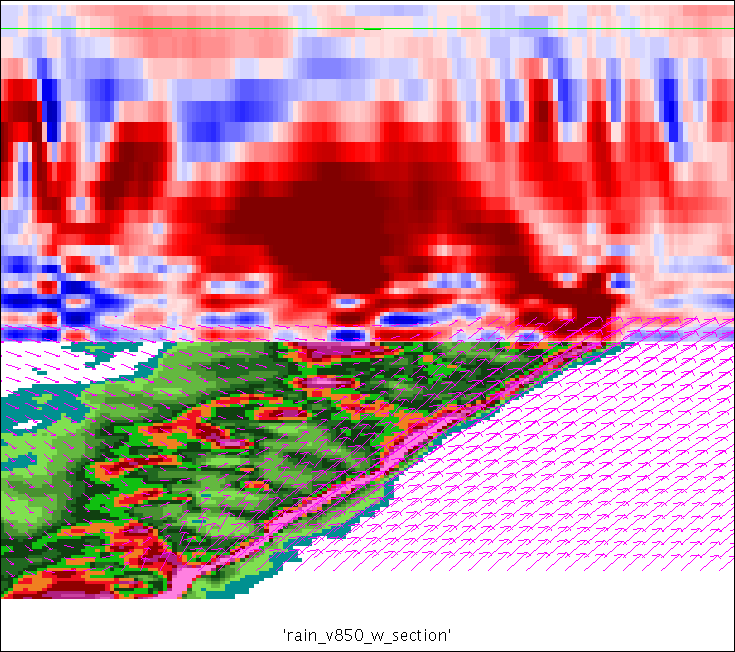

In [13]:
%make_image -caption 'rain_v850_w_section' 

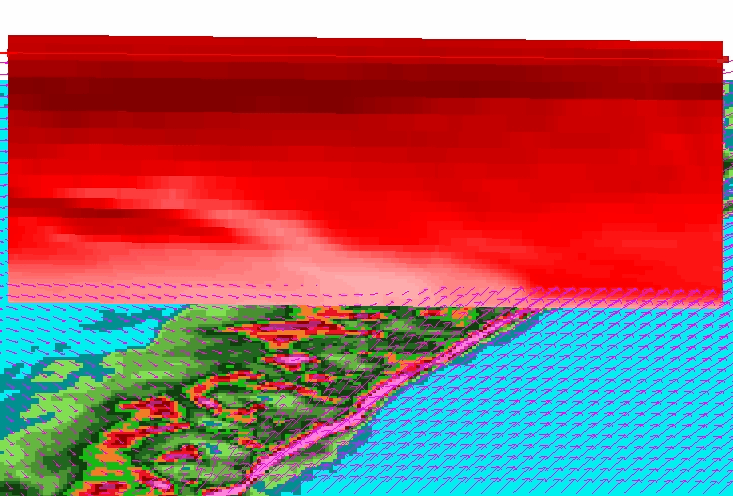

In [15]:
# Moving image 
%make_movie

### Caption: 
The movie above indicates that a squall can be a positive SKEdot source

<hr style="height:2px;">
<a href="#top">Top</a>
<hr style="height:2px;">

<a name="Anchor2"></a> 
## Anchor 2: More details

<div class="alert alert-info">
    <b>Note</b>:
     Make some Python plots of the data from the bundle
</div>

### Do Python computations with the 7km G5NR data, using G5NRutils.py as obtained from 
https://github.com/suvarchal/G5NR_Interactive_notebooks

In [39]:
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs as ccrs
import xarray as xr
import numpy as np
from datetime import datetime


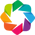

In [40]:
hv.notebook_extension('bokeh') #other backend is matplotlib but can be changed on the fly just before plottting

### Example: horizontal maps of product terms
#### Compute in next cell, then there is a display cell

In [50]:
# 7km data grids from unzipping of .zidv bundle
xrdata_3d = xr.open_dataset('data_0_3D7km30minuteInst')

# XARRAY computations
uw=xrdata_3d.u*xrdata_3d.w
uw.name='uw'
vw=xrdata_3d.v*xrdata_3d.w
vw.name='vw'
uv=xrdata_3d.u*xrdata_3d.v
uv.name='uv'

# Merge derived with raw fields 
xrdata_3d_all=xr.merge([xrdata_3d,uw,vw,uv])

# GEOVIEWS conversion
subgrid_gv=gv.Dataset(xrdata_3d_all)

# GEOVIEWS display (Image) creation
# dynamic = True is faster to execute but slower to interact: images are made on the fly during interaction
# dynamic = False is slower to execute, but faster to interact: all images are precomputed now

U_img   =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['u'],label='U',dynamic=True).redim.range(u=(-15,15))
V_img   =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['v'],label='V',dynamic=True).redim.range(v=(-15,15))
W_img   =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['w'],label='W',dynamic=True).redim.range(w=(-2,2))
UW_img=subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['uw'],label='UW',dynamic=True).redim.range(uw=(-50,50))
VW_img=subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['vw'],label='VW',dynamic=True).redim.range(vw=(-50,50))
UV_img=subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['uv'],label='UV',dynamic=True).redim.range(vw=(-50,50))

In [49]:
%%output backend='bokeh' #backend changed to bokeh, gives more options for tooltip
%%opts Image (cmap='RdBu_r') [width=300 height=200 colorbar=True toolbar='above'] Feature.Lines (line_color='gray' line_width=0.5)
%%output size=90

# Here is the Magic Command to Create the Displays! 
(U_img+V_img+W_img+UW_img+VW_img+UV_img).cols(3)     # cols specifies how many columns of plots

:Layout
   .DynamicMap.I   :DynamicMap   [lev,time]
      :Image   [lon,lat]   (u)
   .DynamicMap.II  :DynamicMap   [lev,time]
      :Image   [lon,lat]   (v)
   .DynamicMap.III :DynamicMap   [lev,time]
      :Image   [lon,lat]   (w)
   .DynamicMap.IV  :DynamicMap   [lev,time]
      :Image   [lon,lat]   (uw)
   .DynamicMap.V   :DynamicMap   [lev,time]
      :Image   [lon,lat]   (vw)
   .DynamicMap.VI  :DynamicMap   [lev,time]
      :Image   [lon,lat]   (uv)

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="Anchor3"></a> 
<div class="alert alert-success">
    <b>Conclusions</b>:
     <ul>
      <li>**Squall line cases of positive SKEdot do exist, as shown above**
           </li>      
    </ul>
</div>

### Let's look at other cases too 

<a href="#top">Top</a>
<hr style="height:2px;">